In [1]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/contam2022.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
contam = pd.read_csv(ruta, parse_dates = True, index_col=0) #llamando el archivo usando pandas
contam.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [4]:
contam.columns = ['ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10']  #para cambiar el nombre de las columnas
contam.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


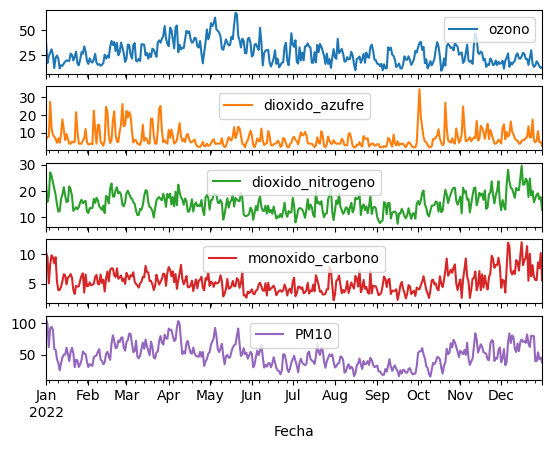

In [5]:
contam.plot(subplots=True) #para obtener un gráfico con los contaminantes para cada año
plt.show()

In [12]:
np.sqrt(len(contam)) #nos da el número de bins lo cual nos ayuda a construir el gráfico

np.float64(19.1049731745428)

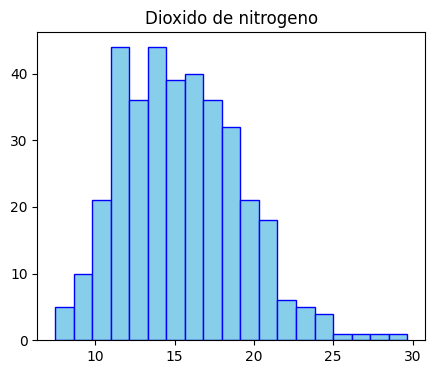

In [13]:
plt.figure(figsize=(5,4))
plt.hist(contam['dioxido_nitrogeno'], bins=19,
         color='skyblue', edgecolor='blue')
plt.title('Dioxido de nitrogeno')
plt.show()

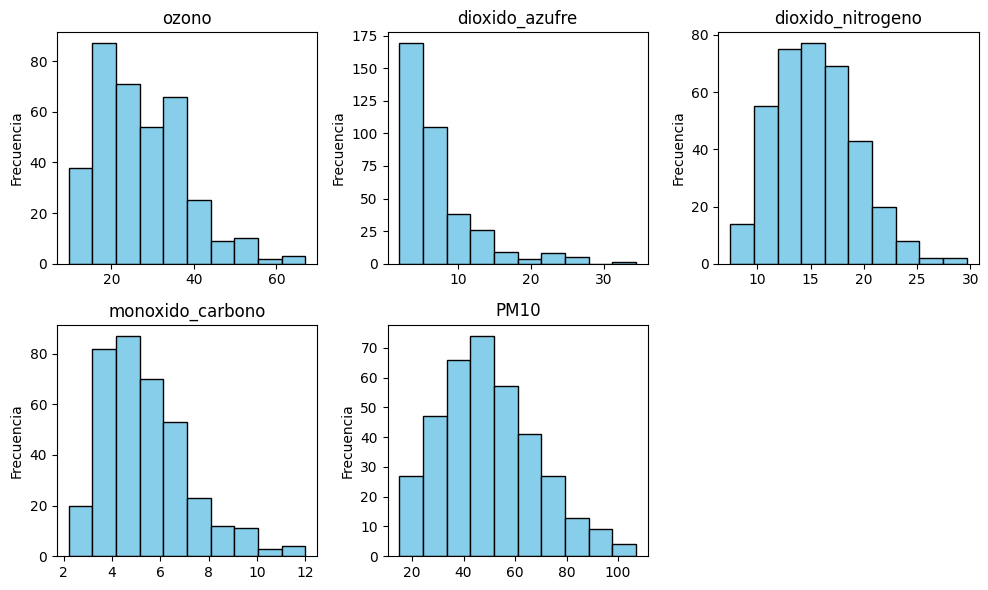

In [8]:
#para obtener un histograma para cada contaminante
plt.figure(figsize=(10, 6))

plt.subplot(2,3,1) # Primer subplot

plt.hist(contam['ozono'], color='skyblue', edgecolor='black')
plt.title('ozono')
plt.ylabel('Frecuencia')
plt.subplot(2,3,2) # Segundo subplot
plt.hist(contam['dioxido_azufre'], color='skyblue', edgecolor='black')
plt.title('dioxido_azufre')
plt.ylabel('Frecuencia')
plt.subplot(2,3,3)
plt.hist(contam['dioxido_nitrogeno'], color='skyblue', edgecolor='black')
plt.title('dioxido_nitrogeno')
plt.ylabel('Frecuencia'
plt.subplot(2,3,4)
plt.hist(contam['monoxido_carbono'], color='skyblue', edgecolor='black')
plt.title('monoxido_carbono')
plt.ylabel('Frecuencia')
plt.subplot(2,3,5)
plt.hist(contam['PM10'], color='skyblue', edgecolor='black')
plt.title('PM10')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

La curtosis describe el grado en que las colas de una distribución difieren de las colas de una distribución normal. Mide qué tan afilada o achatada es la distribución en comparación con la normal.


Tipos de curtosis
*   Leptocúrtica: K>0 un pico más alto y estrecho que la normal
*   Mesocúrtica: K=0 similar a la distribución normal
*   Platicúrtica: K<0 un pico más achatado de lo normal


In [14]:
curtosis = contam.kurt()
print(curtosis)

ozono                0.608176
dioxido_azufre       4.881479
dioxido_nitrogeno    0.300435
monoxido_carbono     1.239080
PM10                -0.166532
dtype: float64


In [10]:
# Calcular correlación entre todas las columnas numéricas
#para una correlación lineal
contam.corr(method='pearson')

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
dioxido_azufre,0.101920,1.000000,0.310672,0.180158,0.456039
dioxido_nitrogeno,0.142250,0.310672,1.000000,0.844692,0.626440
monoxido_carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
PM10,0.481932,0.456039,0.626440,0.559163,1.000000


In [11]:
#para prueba de hipótesis
#p < 0.05 se rechaza hipotesis nula

from scipy.stats import shapiro

for col in contam.columns:
    stat, p = shapiro(contam[col])
    print(f"{col}: Estadístico = {stat:.3f}, p-valor = {p:.8f}")

ozono: Estadístico = 0.946, p-valor = 0.00000000
dioxido_azufre: Estadístico = 0.791, p-valor = 0.00000000
dioxido_nitrogeno: Estadístico = 0.981, p-valor = 0.00010877
monoxido_carbono: Estadístico = 0.941, p-valor = 0.00000000
PM10: Estadístico = 0.980, p-valor = 0.00005488
